In [20]:
import os
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


### File Retrieval and Preprocessing

In [2]:
files = os.listdir('../final_stats/preprocessed_3/')
files[:2]

['preprocessed_no_sent_last_1.csv', 'preprocessed_no_sent_last_3.csv']

In [3]:


def split_target(df, target_col='away_winner_wts'):
    df = df.copy()
    target = df.pop(target_col)
    return df, target

def normalize_df(df):
    scaler = StandardScaler()
    data, target = split_target(df)
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return data, target

def get_data(file):
    df = pd.read_csv(f'../final_stats/preprocessed_3/{file}', index_col=[0])
    data, target = normalize_df(df)
    return data, target

def remove_last_1(df):
    df = df.copy()
    df.drop(df.iloc[:, 1:52], inplace=True, axis=1)
    df.drop(df.iloc[:, 53:103], inplace=True, axis=1)
    return df

def get_data_skip_last_1(file):
    df = pd.read_csv(f'../final_stats/preprocessed/{file}', index_col=[0])
    # df = remove_last_1(df)
    data, target = normalize_df(df)
    return data, target


In [6]:
print(files[1])
df = pd.read_csv(f'../final_stats/preprocessed_3/{files[2]}', index_col=[0])
# df.head()
x, y = get_data(files[1])
x.head()

preprocessed_no_sent_last_3.csv


,home_score_team,home_score_opp,home_pass_cmp_off,home_pass_att_off,home_pass_yds_off,home_pass_tds_off,home_sacks_off,home_sacks_yds_off,home_pass_qb_rate,home_rush_att_off,...,away_ravens,away_saints,away_seahawks,away_steelers,away_texans,away_titans,away_vikings,day_Sat,day_Sun,day_Thu
0,-0.330684,-1.022436,-1.185954,-0.990053,-0.197476,0.349873,0.015198,0.208516,0.087025,-0.033972,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
1,0.244527,0.938400,0.200903,0.001574,0.729646,0.349873,-0.303967,-0.043624,1.006098,0.639060,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
2,1.970161,0.557127,0.857836,0.001574,1.969984,2.209956,-1.261462,-1.136230,3.156507,-0.168578,...,-0.199007,-0.199007,-0.171499,-0.199007,5.024938,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
3,0.244527,-0.804566,-1.258947,-0.824782,-0.986782,-1.045190,-0.303967,0.418632,-1.113307,2.321639,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
4,-0.958188,0.230321,-1.185954,-1.100234,-1.368906,-1.045190,-0.623132,-0.505880,-1.472078,-0.168578,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607


### Chart Code

In [18]:
def get_average_acc_history(acc_histories):
    num_epochs = len(acc_histories[0])
    return [np.mean([x[i] for x in acc_histories]) for i in range(num_epochs)]

def get_average_loss_history(loss_histories):
    num_epochs = len(loss_histories[0])
    return [np.mean([x[i] for x in loss_histories]) for i in range(num_epochs)]
        
def plot_ave_acc_and_loss_histories(acc_histories, loss_histories):
    average_acc_history = get_average_acc_history(acc_histories)
    average_loss_history = get_average_loss_history(loss_histories)

    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")

    plt.subplot(1, 2, 2)

    plt.plot(range(1, len(average_loss_history) + 1), average_loss_history)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
    plt.show()

def compare_ave_loss_acc_histories(acc_hist_1, acc_hist_2, loss_hist_1, loss_hist_2):
    min_epochs = min(len(acc_hist_1[0]), len(acc_hist_2[0]))
    
    ave_acc_hist_1 = get_average_acc_history(acc_hist_1)
    ave_loss_hist_1 = get_average_loss_history(loss_hist_1)
    
    ave_acc_hist_2 = get_average_acc_history(acc_hist_2)
    ave_loss_hist_2 = get_average_loss_history(loss_hist_2)


    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    epochs = range(1, min_epochs + 1)
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, ave_acc_hist_1, solid_blue_line, label='Model 1')
    plt.plot(epochs, ave_acc_hist_2, solid_red_line, label='Model 2')
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(epochs, ave_loss_hist_1, solid_blue_line, label='Model 1')
    plt.plot(epochs, ave_loss_hist_2, solid_red_line, label='Model 2')
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
    plt.legend()
    
    plt.show()
    

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB


### Repeated K-Fold Cross Validation
Limited in dataset so want to run a few times
Grid search of the learning rate and the n-estimators perameter
Hold out test set of 0.2 

In [148]:
# create NB model with smoothing hyperparam
def get_nb_model(smoothing=1e-9):
    clf = GaussianNB(var_smoothing=smoothing)
    return clf

# grid search
def grid_search(X_train, y_train, smoothings, file):

    max_score = {
        'scores_mean': 0
    }

    all_scores = []
    
    for n in smoothings:
        # get classifier
        clf = get_nb_model(n)

        # k-fold cross validation
        cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=99)

        # run k-fold 
        scores = cross_val_score(
            clf, 
            X_train, 
            y_train, 
            scoring='accuracy', 
            cv=cv, 
            n_jobs=-1
        )
        # add scores to scores dictionary
        scores_dict = {
            'file': file,
            'scores_mean': scores.mean(),
            'scores_std': scores.std(),
            'smoothing': n,
            'scores': scores,
        }
        all_scores.append(scores_dict)
        # if new max score, add to max_score dict
        if scores.mean() > max_score['scores_mean']:
            max_score = scores_dict
    return all_scores, max_score


In [69]:
smoothings = np.logspace(0,-9, num=100)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

all_scores_1, max_score_1 = grid_search(x,y, smoothings, 'something.csv')

In [35]:
def get_best_params(all_scores):
    ms = max(all_scores, key=lambda x:x['scores_mean'])
    print(f"Accuracy: {round(ms['scores_mean']*100,2)}%")
    print(f"Best Paramaters: \n var_smoothing: {ms['smoothing']}")



In [36]:
get_best_params(all_scores_1)

Accuracy: 55.52%
Best Paramaters: 
 var_smoothing: 5.336699231206302e-08


### Train Base Model and Test

In [37]:
def test_model(max_score, X_train, y_train, X_test, y_test):
    base_model = get_nb_model(max_score['smoothing'])
    base_model.fit(X_train, y_train)

    score = base_model.score(X_test, y_test)
    print(f"Final Accuracy: {round(score*100, 2)}%")

    return score

In [28]:
score = test_model(max_score_1, X_train, y_train, X_test, y_test)

Final Accuracy: 52.38%


### Run for every dataset on base model??


## figure out best model without any sentiment
then use that for rest of model
train on all data, no holdout test set, not enough data

## no sentiment files

In [40]:
no_sent_files = files[:7]

In [149]:
def all_datasets(files):
    results = [ ]
    smoothings = np.logspace(0,-9, num=100)

    for file in files:
        x, y = get_data(file)
        all_scores, max_score = grid_search(x, y, smoothings, file)
        # print(max_score)
        # test_score = test_model(max_score, X_train, y_train, X_test, y_test)
        results.append(max_score)
    return results

results = all_datasets(no_sent_files)


In [150]:
df_results = pd.DataFrame.from_records(results, index='file').sort_values('scores_mean', ascending=False)
df_results

,scores_mean,scores_std,smoothing,scores
file,,,,
preprocessed_no_sent_last_7.csv,0.554455,0.129873,5.336699e-01,"[0.5454545454545454, 0.6363636363636364, 0.454..."
preprocessed_no_sent_last_7_wt.csv,0.554455,0.129873,5.336699e-01,"[0.5454545454545454, 0.6363636363636364, 0.454..."
preprocessed_no_sent_last_1.csv,0.549455,0.145422,1.000000e-04,"[0.5454545454545454, 0.6363636363636364, 0.454..."
preprocessed_no_sent_last_ssn.csv,0.542000,0.134076,1.873817e-02,"[0.45454545454545453, 0.6363636363636364, 0.36..."
preprocessed_no_sent_last_ssn_wt.csv,0.542000,0.134076,1.873817e-02,"[0.45454545454545453, 0.6363636363636364, 0.36..."
preprocessed_no_sent_last_3.csv,0.539000,0.147790,1.232847e-09,"[0.5454545454545454, 0.6363636363636364, 0.545..."
preprocessed_no_sent_last_3_wt.csv,0.539000,0.147790,1.232847e-09,"[0.5454545454545454, 0.6363636363636364, 0.545..."


Best accuracy comes from datasets with last 7 games.  
Both weighted and not weighted had the same accuracy of 57.36%.

Try and create a dataframe with just the scores so that can plot boxplots  
Column labels should be file, with values being all the scores.

Take the scores values and expand them then transpose to get datasets as columns

Index(['preprocessed_no_sent_last_7.csv', 'preprocessed_no_sent_last_7_wt.csv',
       'preprocessed_no_sent_last_1.csv', 'preprocessed_no_sent_last_ssn.csv',
       'preprocessed_no_sent_last_ssn_wt.csv',
       'preprocessed_no_sent_last_3.csv',
       'preprocessed_no_sent_last_3_wt.csv'],
      dtype='object', name='file')


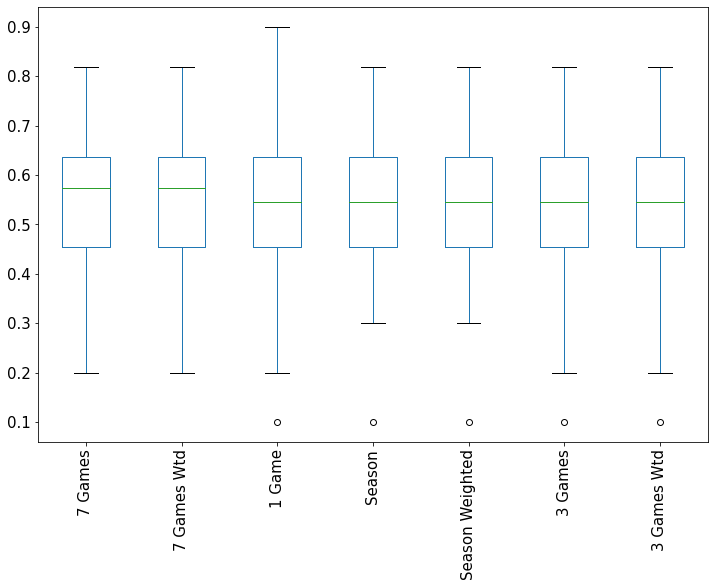

In [152]:
column_dict_no_sent = {
    'preprocessed_no_sent_last_7.csv': '7 Games',
    'preprocessed_no_sent_last_7_wt.csv': '7 Games Wtd',
    'preprocessed_no_sent_last_1.csv': '1 Game',
    'preprocessed_no_sent_last_3.csv': '3 Games',
    'preprocessed_no_sent_last_3_wt.csv': '3 Games Wtd',
    'preprocessed_no_sent_last_ssn.csv': 'Season',
    'preprocessed_no_sent_last_ssn_wt.csv': 'Season Weighted',
}
def get_box_plot(df, col_labels):
    scores = df['scores'].apply(pd.Series).transpose()
    print(scores.columns)
    scores = scores.rename(columns=col_labels)
    scores.boxplot(rot=90, figsize=(12,8), grid=False, fontsize=15)

get_box_plot(df_results, column_dict_no_sent)

7 Games, 7 Games Weigthed and 1 Game best accuracies. 
Use 7 games then as most accurate and easier to calculate for future studies. 

In [64]:
def get_top_score(results):
    top_score = 0
    top_index = []
    top_results = []
    for i, result in enumerate(results):
        # print(f'Accuracy: {result[1]['scores_mean']}')
        if result[1]['scores_mean'] >= top_score:
            top_results.append([result[0], result[1]['scores_mean'], result[1]['scores_std']])
            top_score = result[1]['scores_mean']
            # top_index.append(i)

    # print('Top Score: ', top_score, '\t Top Data: ', results[top_index][0])
    return top_results
get_top_score(results)

[['preprocessed_no_sent_last_1.csv', 0.5615151515151514, 0.1613592971389824],
 ['preprocessed_no_sent_last_7.csv', 0.5736363636363637, 0.14282374658834462],
 ['preprocessed_no_sent_last_7_wt.csv',
  0.5736363636363637,
  0.14282374658834462]]

In [153]:
files_7_games = [f for f in files if 'last_7' in f]
files_test = files_7_games
files_test

['preprocessed_no_sent_last_7.csv',
 'preprocessed_no_sent_last_7_wt.csv',
 'preprocessed_sent_24_last_7.csv',
 'preprocessed_sent_24_last_7_wt.csv',
 'preprocessed_sent_96_last_7.csv',
 'preprocessed_sent_96_last_7_wt.csv',
 'preprocessed_sent_cross_last_7.csv',
 'preprocessed_sent_cross_last_7_wt.csv']

In [145]:
results_test = all_datasets(files_test)


In [146]:
df_results_test = pd.DataFrame.from_records(results_test, index='file').sort_values('scores_mean', ascending=False)
df_results_test

,scores_mean,scores_std,smoothing,scores
file,,,,
preprocessed_sent_24_last_7.csv,0.580000,0.152236,0.351119,"[0.5454545454545454, 0.6363636363636364, 0.454..."
preprocessed_sent_24_last_7_wt.csv,0.580000,0.152236,0.351119,"[0.5454545454545454, 0.6363636363636364, 0.454..."
preprocessed_no_sent_last_7.csv,0.573636,0.142824,0.533670,"[0.5454545454545454, 0.6363636363636364, 0.454..."
preprocessed_no_sent_last_7_wt.csv,0.573636,0.142824,0.533670,"[0.5454545454545454, 0.6363636363636364, 0.454..."
preprocessed_sent_96_last_7.csv,0.571212,0.146738,0.351119,"[0.5454545454545454, 0.5454545454545454, 0.454..."
preprocessed_sent_96_last_7_wt.csv,0.571212,0.146738,0.351119,"[0.5454545454545454, 0.5454545454545454, 0.454..."
preprocessed_sent_cross_last_7.csv,0.570909,0.146838,0.187382,"[0.45454545454545453, 0.6363636363636364, 0.45..."
preprocessed_sent_cross_last_7_wt.csv,0.570909,0.146838,0.187382,"[0.45454545454545453, 0.6363636363636364, 0.45..."


In [154]:
df_results.to_csv('../results/nb_results.csv')

Index(['preprocessed_sent_24_last_7.csv', 'preprocessed_sent_24_last_7_wt.csv',
       'preprocessed_no_sent_last_7.csv', 'preprocessed_no_sent_last_7_wt.csv',
       'preprocessed_sent_96_last_7.csv', 'preprocessed_sent_96_last_7_wt.csv',
       'preprocessed_sent_cross_last_7.csv',
       'preprocessed_sent_cross_last_7_wt.csv'],
      dtype='object', name='file')


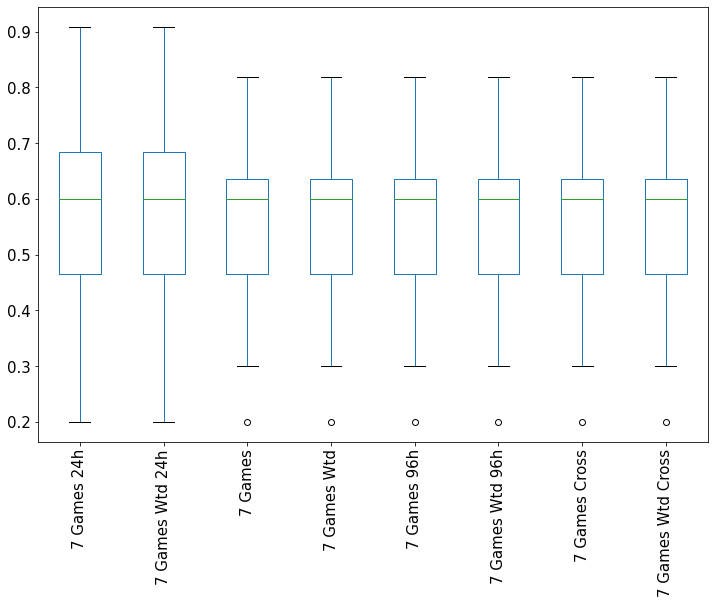

In [147]:
column_dict_test = {
    'preprocessed_no_sent_last_7.csv': '7 Games',
    'preprocessed_no_sent_last_7_wt.csv': '7 Games Wtd',
    'preprocessed_no_sent_last_1.csv': '1 Game',
    'preprocessed_sent_24_last_7.csv': '7 Games 24h',
    'preprocessed_sent_24_last_7_wt.csv': '7 Games Wtd 24h',
    'preprocessed_sent_96_last_7.csv': '7 Games 96h',
    'preprocessed_sent_96_last_7_wt.csv': '7 Games Wtd 96h',
    'preprocessed_sent_cross_last_7.csv': '7 Games Cross',
    'preprocessed_sent_cross_last_7_wt.csv': '7 Games Wtd Cross',
    'preprocessed_sent_24_last_1.csv': '1 Game 24h',
    'preprocessed_sent_96_last_1.csv': '1 Game 96h',
    'preprocessed_sent_cross_last_1.csv': '1 Game Cross'
}
get_box_plot(df_results_test, column_dict_test)

### 5 Top models Achieving 57% accuracy on test holdout set
1. 96 Hour Sentiment model + last 1 + last 5
2. 96 Hour Sentiment model + last 3
3. 24 Hour Sentiment model + last 3
